In [8]:
# %load notebook_setup.py
#Use %load notebook_setup.py to load these commands at the top of your
#ipython notebook.  Includes running the std_libraries.py file. 

%run std_libraries.py
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook

Importing yeast_esr_exp.  If autoreload, may need to reset base_dir and data_processing dir 
  yeast_esr_exp.base_dir=base_dir 
 yeast_esr_exp.data_processing_dir = data_processing_dir
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = othera
base directory is C:\Users\BMH_work\github\yeast_esr_expression_analysis
Importing yeast_esr_exp and setting base_dir and data_processing_dir
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#Set up orth dir variables

orth_dir_YGOB =  data_processing_dir + "ortholog_files_YGOB" + os.sep

orth_dir_regev = data_processing_dir + "ortholog_files_regev" + os.sep


## Build Vpol map to non YGOB species

In [ ]:
#ONly need to do this once - building ortholog files for Vpol to ['Dhan', 'Calb', 'Ylip', 'Sjap','Spom']
#via Vpol-Lklu from YGOB and Lklu-spec for each species

# for spec in ['Lwal','Dhan',  'Calb', 'Ylip', 'Sjap','Spom']: 
    
#     self_spec = 'Vpol'

#     spec_via = 'Lklu'

#     #read in self to spec_via data

#     orth_dir_YGOB = data_processing_dir + 'ortholog_files_YGOB' + os.sep 

#     self_via = io_library.read_orth_lookup_table(self_spec, spec_via, orth_dir_YGOB)

#     # for this ortholog mapping from YGOB there is only one Lklu gene for any Vpol gene

#     # for self_gene, via_genes in self_via.items():
#     #     if len(via_genes)>1:
#     #         print(self_gene)
#     #         print(via_genes)

#     #read in spec_via to spec data

#     orth_dir = data_processing_dir + 'ortholog_files' + os.sep 

#     via_spec = io_library.read_orth_lookup_table(spec_via, spec, orth_dir)

#     orth_lookup_outputfname = os.path.normpath(data_processing_dir + 'ortholog_files/' + self_spec + "-" + spec + "-orthologs.txt"  )

#     # print(orth_lookup_outputfname)
#     with open(orth_lookup_outputfname, 'w') as fw:

#         for self_gene, via_genes in self_via.items():
#             if len(via_genes)>1:
#                 print('There are ' + str(len(via_genes)) + ' '+ spec_via + ' genes listed for ' + self_spec + 'gene ' + self_gene)
#                 print(via_genes)
#             elif via_genes[0]=='NONE':
#                 spec_genes = ['NONE']
#             else: 
#                 via_gene = via_genes[0]
#                 if via_gene in via_spec.keys():
#                     spec_genes = via_spec[via_gene]
#                 else:
#                     print(via_gene + ' not in ortholog lookup')
#                     spec_genes = ['NONE']
#             fw.write(self_gene + '\t' + '\t'.join(spec_genes) + '\n')
#     print(orth_lookup_outputfname + ' complete')
  

In [18]:
#Vpol to Lwal: make from YGOB pillars, then remove underline for regev data
#Smik to Smik: remove underline from regev side

#load Vpol to Lwal from YGOB

spec1 = 'Smik_YGOB'
spec2 = 'Smik_regev'
orth_dir_in = orth_dir_regev
orth_dir_out = orth_dir_regev

spec1_spec2_YGOB = io_library.read_orth_lookup_table(spec1,spec2, orth_dir_in)


#Remove first underscore from Lwal 
spec1_spec2_regev = {}
for spec1_gene, spec2_genes in spec1_spec2_YGOB.items():
    if spec2_genes[0]=='NONE':
        spec1_spec2_regev[spec1_gene] = ['NONE']
    else: 
        spec2_genes_regev = []
        for spec2_gene in spec2_genes: 
            #remove only the first underscore
            spec2_gene_regev = spec2_gene.split('_')[0] + '_'.join(spec2_gene.split('_')[1:])
            spec2_genes_regev.append(spec2_gene_regev)
        spec1_spec2_regev[spec1_gene] = spec2_genes_regev
spec1_spec2_regev

#Save again in regev data folder
orth_lookup_outputfname = os.path.normpath(orth_dir_out + spec1 + "-" + spec2 + "-orthologs.txt"  )

io_library.print_ortholog_file(orth_lookup_outputfname, spec1_spec2_regev)

## Look for amino acid matches between YGOB and Regev genenames

In [7]:
base_dir

'C:\\Users\\BMH_work\\github\\yeast_esr_expression_analysis'

In [9]:
# #Only need to do once
# #Gets AA sequence from YGOB genome.tab and sequence.fas file and deposits them 
# #in a file.
# #only works on gpucluster right now because that's where the genomes are

# specs = ['Cgla'] 

# ygob_genome_dir = "C:\\Users\\BMH_work\\github\\y1000plus_tools\\genomes\\YGOB\\"

# for spec in specs: 
#     yeast_esr_exp.ygob_AA_extract(spec, ygob_genome_dir)
    
# #At least one bad gene on chromosome 3

Cgla
scaffold: cgla_Chr_1
scaffold: cgla_Chr_2
scaffold: cgla_Chr_3


C:\Users\BMH_work\anaconda3\envs\yeast_esr_expression\lib\site-packages\Bio\Seq.py:2859: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


scaffold: cgla_Chr_4
scaffold: cgla_Chr_5
scaffold: cgla_Chr_6
scaffold: cgla_Chr_7
scaffold: cgla_Chr_8
scaffold: cgla_Chr_9
scaffold: cgla_Chr_10
scaffold: cgla_Chr_11
scaffold: cgla_Chr_12
scaffold: cgla_Chr_13
All AA seqs for Cgla saved in C:\Users\BMH_work\github\yeast_esr_expression_analysis\expression_data\ortholog_files_YGOB\AA_lists\Cgla_AA_list.fasta


In [48]:
# #Only need to do once
# #Gets AA sequence from YGOB genome.tab and sequence.fas file and deposits them 
# #in a file.
# #only works on gpucluster right now because that's where the genomes are

# ygob_genome_dir = "C:\\Users\\BMH_work\\github\\y1000plus_tools\\genomes\\YGOB\\"

# for spec in specs: 
#     yeast_esr_exp.ygob_AA_extract(spec, ygob_genome_dir)

#At least one bad sequence in Ncas chromosome 1
#At least one bad sequence in suva_Chr_2
#At least one bad sequence in Klac chromosome 1

I am importing io_library
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = otherb
base directory is /home/heineike/github/expression_broad_data
data processing dir is /home/heineike/github/expression_broad_data/expression_data/
Suva
scaffold: suva_Chr_1
scaffold: suva_Chr_2


/home/lab/envs/seqanalysis/lib/python3.5/site-packages/Bio/Seq.py:2309: BiopythonWarning:

Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.



scaffold: suva_Chr_3
scaffold: suva_Chr_4
scaffold: suva_Chr_5
scaffold: suva_Chr_6
scaffold: suva_Chr_7
scaffold: suva_Chr_8
scaffold: suva_Chr_9
scaffold: suva_Chr_10
scaffold: suva_Chr_11
scaffold: suva_Chr_12
scaffold: suva_Chr_13
scaffold: suva_Chr_14
scaffold: suva_Chr_15
scaffold: suva_Chr_16
scaffold: suva_Chr_17
scaffold: suva_Chr_18
scaffold: suva_Chr_19
scaffold: suva_Chr_20
scaffold: suva_Chr_21
scaffold: suva_Chr_22
scaffold: suva_Chr_23
scaffold: suva_Chr_24
scaffold: suva_Chr_25
scaffold: suva_Chr_26
scaffold: suva_Chr_27
scaffold: suva_Chr_28
scaffold: suva_Chr_29
scaffold: suva_Chr_30
scaffold: suva_Chr_31
scaffold: suva_Chr_32
scaffold: suva_Chr_33
scaffold: suva_Chr_34
scaffold: suva_Chr_35
scaffold: suva_Chr_36
scaffold: suva_Chr_37
scaffold: suva_Chr_38
scaffold: suva_Chr_39
scaffold: suva_Chr_40
scaffold: suva_Chr_41
scaffold: suva_Chr_42
scaffold: suva_Chr_43
scaffold: suva_Chr_44
scaffold: suva_Chr_45
scaffold: suva_Chr_46
scaffold: suva_Chr_47
scaffold: suva_Ch

In [53]:
#Find matches using genome search

study1 = 'regev'
study2 = 'YGOB'

spec = 'Smik'

use_subset = True
subset = set(ambiguous_list_flat)
pairwise_score_loaded = False #if you have already saved some and want to do the rest

#Just load second one into 
#Check timing with time module
#python parallel programming library
#ipy_parallel dask
#https://ipyparallel.readthedocs.io/en/stable/development/messages.html#parallel-messages

#All by all blast, output top NN results

AA_seqs_fnames = {'regev': data_processing_dir + os.path.normpath('ortholog_files_regev/AA_lists/' + spec + '_AA_list.fasta'), 
                  'YGOB' : data_processing_dir + os.path.normpath('ortholog_files_YGOB/AA_lists/' + spec + '_AA_list.fasta')
                 }


genenames_study1 = []
AA_seqs_study1 = SeqIO.parse(AA_seqs_fnames[study1], "fasta")
for seq_study1 in AA_seqs_study1: 
    genename_study1 = seq_study1.id
    if spec=='Smik': 
        genename_study1_dash = genename_study1
        genename_study1 = 'smik' + genename_study1_dash.split('smik_')[1]
    genenames_study1.append(genename_study1)
    
if use_subset: 
    print('Using Subset genes')
else: 
    subset = set(genenames_study1)
    
if pairwise_score_loaded: 
    genes_to_search = ((subset & set(genenames_study1)) - set(pairwise_score.keys()))
else: 
    pairwise_score = {}
    genes_to_search = (subset & set(genenames_study1))


match_points = 1
mismatch_points = -1
gap_open = -.5
gap_extension = -0.1
NN_top_scores = 5


AA_seqs_study1 = SeqIO.parse(AA_seqs_fnames[study1], "fasta")

N = len(genes_to_search)
for seq_study1 in AA_seqs_study1: 
    check_gene = False
    genename_study1 = seq_study1.id
    if spec=='Smik': 
        genename_study1_dash = genename_study1
        genename_study1 = 'smik' + genename_study1_dash.split('smik_')[1]
    if (pairwise_score_loaded | use_subset):   #checks if gene is in genes tosearch list if either pairwise_score already has been initialized or if we are using a subset of genes
        if genename_study1 in genes_to_search:
            check_gene = True
    else: 
        check_gene=True
        
    if check_gene: 
        print(str(N) + ' ' + genename_study1)
        AA_seqs_study2 = SeqIO.parse(AA_seqs_fnames[study2], "fasta")
        pairwise_score_comps = {}
        for seq_study2 in AA_seqs_study2: 
            genename_study2 = seq_study2.id
            score = pairwise2.align.globalms(seq_study2,seq_study1, match_points, mismatch_points, gap_open, gap_extension, penalize_end_gaps = False, score_only = True )
            pairwise_score_comps[genename_study2] = score
        pairwise_score_comps_df = pd.Series(pairwise_score_comps)
        pairwise_score[genename_study1] = pairwise_score_comps_df.sort_values(ascending=False).iloc[0:NN_top_scores]
        #print(pairwise_score[genename_YGOB])
        N = N - 1



Using Subset genes
171 smik1-g3.1
170 smik2-g4.1
169 smik8-g1.1
168 smik10-g3.1
167 smik11-g9.1
166 smik25-g3.1
165 smik32-g7.1
164 smik34-g9.1
163 smik35-g4.1
162 smik38-g1.1
161 smik74-g1.1
160 smik74-g3.1
159 smik96-g2.1
158 smik96-g3.1
157 smik99-g6.1
156 smik100-g1.1
155 smik101-g1.1
154 smik113-g5.1
153 smik120-g4.1
152 smik120-g6.1
151 smik122-g23.1
150 smik125-g1.1
149 smik128-g1.1
148 smik129-g8.1
147 smik132-g19.1
146 smik132-g21.1
145 smik134-g5.1
144 smik144-g12.1
143 smik144-g13.1
142 smik146-g13.1
141 smik178-g3.1
140 smik188-g4.1
139 smik188-g5.1
138 smik193-g16.1
137 smik193-g17.1
136 smik196-g4.1
135 smik198-g1.1
134 smik201-g3.1
133 smik202-g5.1
132 smik202-g17.1
131 smik203-g1.1
130 smik203-g3.1
129 smik203-g4.1
128 smik205-g1.1
127 smik205-g2.1
126 smik205-g5.1
125 smik208-g1.1
124 smik208-g2.1
123 smik211-g1.1
122 smik216-g7.1
121 smik225-g3.1
120 smik250-g6.1
119 smik253-g1.1
118 smik254-g10.1
117 smik260-g2.1
116 smik271-g3.1
115 smik277-g15.1
114 smik279-g7.1
11

In [54]:
#Save pairwise_score dictionary
orth_dir = orth_dir_regev
pairwise_score_fname = orth_dir + os.path.normpath("AA_lists/" + spec + "_pairwise_score.pkl")

with open(pairwise_score_fname,'wb') as file: 
    pickle.dump(pairwise_score, file)

Identifying mismatches between K.Lac regev orthologs and K.Lac YGOB orthologs

The main problem is that the regev microarray data had a number of labels that don't match the reference labels (which is what YGOB uses). This is mainly on the E chromosome.  At first I thought it was just a simple shift - 1 or 10 off of the actual number, but after looking at KLLA0E19767 in the regev data (which maps to KLLA0E19669 in the YGOB/NCBI data) and KLLA0E19855g) (maps to KLLA0E19757) it looks like it isn't that simple (those are 98 apart in both cases) 

This isn't a problem when I go from S.Cer to K.Lac (because regev provided an ortholog file and based on protein sequence similarity it looks like that is internally consistent), but it is a problem for reporting those results using K.Lactis indices. 

(Need a regev to YGOB map to report K.Lac genes from that data)


It is also a problem going from Vpol to K.Lac because regev didn't have a map, so the vpol mapping from YGOB to regev data misses a bunch of proteins on the E chromosome.  

(Need a YGOB to regev map to look up data for K.Lac orthologs of V.pol) 



So...

I need to identify genes in each set that don't match and then do protein sequence comparisons. 


In [ ]:
# Identify Genes that don't match between YGOB and Regev K.Lac data

#Load YGOB KLAC list
orth_dir_YGOB =  data_processing_dir + "ortholog_files_YGOB" + os.sep

kl_lookup_YGOB = io_library.read_orth_lookup_table('Klac','Scer', orth_dir_YGOB)
kl_genes_YGOB = set(kl_lookup_YGOB.keys())

#Load regev Klac list
orth_dir_regev = data_processing_dir + "ortholog_files_regev" + os.sep

kl_lookup_regev = io_library.read_orth_lookup_table('Klac','Scer', orth_dir_regev)
kl_genes_regev = set(kl_lookup_regev.keys())

#Print files into .txt
with open(orth_dir_regev + os.sep + 'Klac_regev_not_YGOB.txt','w') as f:
    for gene in list(kl_genes_regev-kl_genes_YGOB):
        f.write(gene + '\n')
    
with open(orth_dir_regev + os.sep + 'Klac_YGOB_not_regev.txt','w') as f:
    for gene in list(kl_genes_YGOB-kl_genes_regev):
        f.write(gene + '\n')

In [ ]:
#There is not a single gene on the K.Lac E chromosome that matches between datasets (a bit surprising to me at first glance)
for gene in list(kl_genes_regev & kl_genes_YGOB):
    if gene.split('0')[1][0]=='E':
        print(gene)

In [ ]:
#The subset of genes to lookup for K.Lac YGOB is
kl_genes_YGOB-kl_genes_regev

#and vice versa for K.Lac regev
kl_genes_regev-kl_genes_YGOB

## For Pairwise score data, make ortholog file

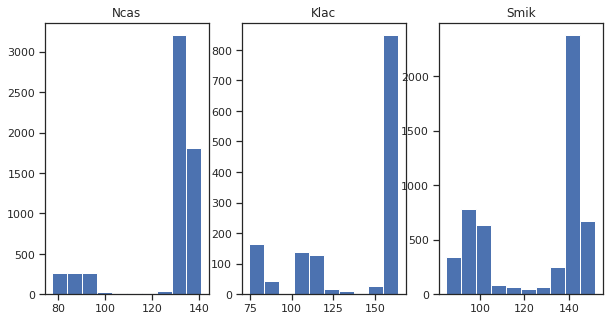

In [68]:
## Show histogram of the pairwise scores and use it to choose thresholds: 

fig, axarr = plt.subplots(1,3, figsize=(10,5))

#pairwise_scores = {}
for jj, spec in enumerate(['Ncas','Klac','Smik']):
    
    pairwise_score_fname = data_processing_dir + os.path.normpath("ortholog_files_YGOB/AA_lists/" + spec + "_pairwise_score.pkl")

    with open(pairwise_score_fname,'rb') as file: 
        pairwise_score= pickle.load(file)
    
    pairwise_scores[spec] = pairwise_score
    #Use histogram to choose thresholds
    maxvals = []
    for genename_YGOB, options in pairwise_score.items(): 
        idxmax = options.idxmax()
        maxval = options[idxmax]
        maxvals.append(maxval)
    
    ax = axarr[jj]
    ax.hist(maxvals)
    ax.set_title(spec)

Based on these histograms, chose, 115 for Ncas, 138 for K.Lac and 125 for Smik. 

<IPython.core.display.Javascript object>


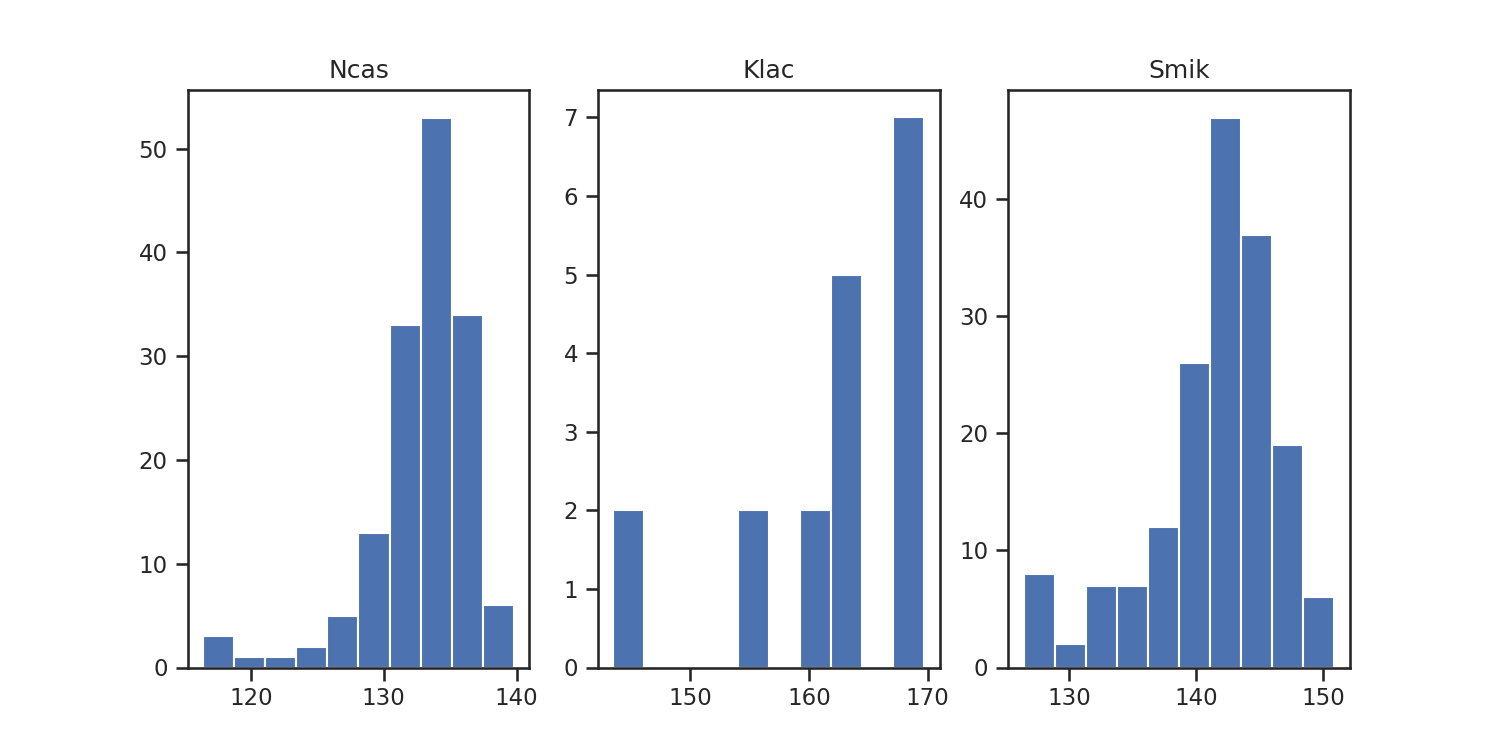

In [55]:
#Ncas Regev to YGOB: 

fig, axarr = plt.subplots(1,3, figsize=(10,5))

pairwise_scores = {}
for jj, spec in enumerate(['Ncas', 'Klac', 'Smik']):
    
    pairwise_score_fname = orth_dir_regev + os.path.normpath("AA_lists/" + spec + "_pairwise_score.pkl")

    with open(pairwise_score_fname,'rb') as file: 
        pairwise_score= pickle.load(file)
    
    pairwise_scores[spec] = pairwise_score
    #Use histogram to choose thresholds
    maxvals = []
    for genename_YGOB, options in pairwise_score.items(): 
        idxmax = options.idxmax()
        maxval = options[idxmax]
        maxvals.append(maxval)
    
    ax = axarr[jj]
    ax.hist(maxvals)
    ax.set_title(spec)

In [56]:
pairwise_scores['Smik_regev']=pairwise_score

In [58]:
spec = 'Smik_regev'

high_thresh_dict ={'Ncas':115, 'Smik': 121, 'Klac': 138, 'Ncas_regev':120, 'Klac_regev':138, 'Smik_regev':130}

high_thresh = high_thresh_dict[spec]
low_thresh = high_thresh
diff_thresh = 10.0

study1_study2_map = io_library.pairwise_hits_to_orth_dict(pairwise_scores[spec], high_thresh, low_thresh, diff_thresh)

More than one match smik203-g3.1, diff = 5.90
More than one match smik788-g1.1, diff = 5.70
diff thresh never met smik788-g1.1
More than one match smik196-g4.1, diff = 2.70
More than one match smik519-g1.1, diff = 0.80
More than one match smik205-g1.1, diff = 1.20
More than one match smik839-g3.1, diff = 4.00
More than one match smik831-g11.1, diff = 5.70
More than one match smik787-g3.1, diff = 2.80
diff thresh never met smik787-g3.1
More than one match smik144-g13.1, diff = 2.00
More than one match smik132-g21.1, diff = 2.80
diff thresh never met smik132-g21.1
More than one match smik202-g5.1, diff = 2.30
More than one match smik96-g3.1, diff = 0.40
More than one match smik100-g1.1, diff = 4.00
More than one match smik911-g10.1, diff = 1.30
More than one match smik208-g2.1, diff = 0.60
diff thresh never met smik208-g2.1
More than one match smik600-g1.1, diff = 3.00
More than one match smik737-g10.1, diff = 5.20
More than one match smik630-g1.1, diff = 0.00
diff thresh never met smik6

In [ ]:
#Load YGOB KLAC list
#for Klac also add in all the known 1:1 genes

orth_dir_YGOB =  data_processing_dir + "ortholog_files_YGOB" + os.sep

kl_lookup_YGOB = io_library.read_orth_lookup_table('Klac','Scer', orth_dir_YGOB)
kl_genes_YGOB = set(kl_lookup_YGOB.keys())

#Load regev Klac list
orth_dir_regev = data_processing_dir + "ortholog_files_regev" + os.sep

kl_lookup_regev = io_library.read_orth_lookup_table('Klac','Scer', orth_dir_regev)
kl_genes_regev = set(kl_lookup_regev.keys())

for gene in list(kl_genes_YGOB & kl_genes_regev): 
    YGOB_regev[gene] = [gene]

In [92]:
orth_lookup_outputfname = os.path.normpath(data_processing_dir + 'ortholog_files_regev/' + spec + "_YGOB-" + spec + "_regev-orthologs.txt"  )

io_library.print_ortholog_file(orth_lookup_outputfname, YGOB_regev)

In [20]:
#Only need to do once
#Make Vpol-spec2 for Regev by combining Vpol-spec2 from YGOB to spec2_YGOB-spec2_regev. 
spec1 = 'Vpol'

for spec2 in ['Ncas','Smik','Klac']:
    spec1_spec2_regev = io_library.make_orth_file_YGOB_regev(spec1, spec2)


I am importing io_library
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = otherb
base directory is /home/heineike/github/expression_broad_data
data processing dir is /home/heineike/github/expression_broad_data/expression_data/
saving /home/heineike/github/expression_broad_data/expression_data/ortholog_files_regev/Vpol-Ncas-orthologs.txt
saving /home/heineike/github/expression_broad_data/expression_data/ortholog_files_regev/Vpol-Smik-orthologs.txt
saving /home/heineike/github/expression_broad_data/expression_data/ortholog_files_regev/Vpol-Klac-orthologs.txt


In [76]:
spec1 = 'Ncas'
spec2 = 'Vpol'
Ncas_Vpol_YGOB = io_library.write_YGOB_orth_lookup_table(spec1, spec2)

/home/heineike/github/expression_broad_data/expression_data/ortholog_files_YGOB/Ncas-Vpol-orthologs.txt


In [79]:
spec1 = 'Ncas'
spec2 = 'Vpol'

Ncas_Vpol_regev_YGOB = io_library.make_orth_file_regev_YGOB(spec1, spec2)

I am importing io_library
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = otherb
base directory is /home/heineike/github/expression_broad_data
data processing dir is /home/heineike/github/expression_broad_data/expression_data/
saving /home/heineike/github/expression_broad_data/expression_data/ortholog_files_regev/Ncas-Vpol-orthologs.txt


In [22]:
#Reverse the dictionary and provide a list of genes in the regev column that are ambiguous and need to be looked up with a blast search
spec = 'Smik'  #also did with Ncas, Klac
YGOB_regev = io_library.read_orth_lookup_table(spec + '_YGOB', spec + '_regev', orth_dir_regev)

ambiguous_list = []
regev_YGOB = {}
for genename_YGOB, genenames_regev in YGOB_regev.items():
    if (len(genenames_regev)==1 )  & (genenames_regev[0] !='NONE'):
        genename_regev = genenames_regev[0]
        regev_YGOB[genename_regev] = [genename_YGOB]
    else: 
        if genenames_regev[0]!='NONE': 
            ambiguous_list.append(genenames_regev)
            
ambiguous_list_flat = list(chain.from_iterable(ambiguous_list))
regev_YGOB
        

{'smik2-g5.1': ['Smik_5.348'],
 'smik1143-g8.1': ['Smik_14.9'],
 'smik202-g15.1': ['Smik_5.22'],
 'smik24-g3.1': ['Smik_6.345'],
 'smik283-g48.1': ['Smik_5.166'],
 'smik760-g13.1': ['Smik_4.407'],
 'smik682-g1.1': ['Smik_12.97'],
 'smik986-g27.1': ['Smik_14.356'],
 'smik521-g15.1': ['Smik_6.141'],
 'smik180-g2.1': ['Smik_4.144'],
 'smik944-g2.1': ['Smik_9.225'],
 'smik509-g5.1': ['Smik_15.542'],
 'smik517-g4.1': ['Smik_6.84'],
 'smik470-g10.1': ['Smik_13.510'],
 'smik697-g4.1': ['Smik_2.391'],
 'smik1015-g4.1': ['Smik_11.60'],
 'smik269-g37.1': ['Smik_7.281'],
 'smik674-g2.1': ['Smik_12.113'],
 'smik330-g15.1': ['Smik_10.303'],
 'smik996-g5.1': ['Smik_7.45'],
 'smik524-g6.1': ['Smik_6.159'],
 'smik663-g13.1': ['Smik_8.243'],
 'smik636-g6.1': ['Smik_9.33'],
 'smik1173-g7.1': ['Smik_12.462'],
 'smik115-g2.1': ['Smik_11.268'],
 'smik319-g3.1': ['Smik_8.65'],
 'smik57-g1.1': ['Smik_15.173'],
 'smik109-g13.1': ['Smik_11.208'],
 'smik16-g2.1': ['Smik_6.388'],
 'smik498-g6.1': ['Smik_15.480']

In [23]:
len(ambiguous_list_flat)

425

In [59]:
#Use new pairwise search results to update dictionary (except for keys that already existed - probably should
#have taken those out at the subset stage
regev_YGOB_old = regev_YGOB.copy()
for study1_gene in list(set(study1_study2_map.keys())-set(regev_YGOB.keys())):
    regev_YGOB[study1_gene] = study1_study2_map[study1_gene]

In [60]:
spec='Smik'
orth_lookup_outputfname = os.path.normpath(data_processing_dir + 'ortholog_files_regev/' + spec + "_regev-" + spec + "_YGOB-orthologs.txt"  )

io_library.print_ortholog_file(orth_lookup_outputfname, regev_YGOB)

In [ ]:
#Ncas to SCer: add NONE for items where there is no match (just missing and causing Key errors before)
#NOte - best to use the file on Ben's laptop - I made a few manual changes before adding the None's
orth_dir_regev = data_processing_dir + "ortholog_files_regev" + os.sep
Ncas_Scer_regev = io_library.read_orth_lookup_table('Ncas','Scer', orth_dir_regev)
Ncas_regev_Ncas_YGOB = io_library.read_orth_lookup_table('Ncas_regev','Ncas_YGOB', orth_dir_regev)

Ncas_Scer_regev_new = Ncas_Scer_regev.copy()

for Ncas_gene_regev in list(set(Ncas_regev_Ncas_YGOB.keys())-set(Ncas_Scer_regev.keys())): 
    Ncas_Scer_regev_new[Ncas_gene_regev] = ['NONE']

Ncas_Scer_regev_new

spec1='Ncas'
spec2='Scer'
orth_lookup_outputfname = os.path.normpath(data_processing_dir + 'ortholog_files_regev/' + spec1 + "-" + spec2 + "-orthologs.txt"  )

io_library.print_ortholog_file(orth_lookup_outputfname, Ncas_Scer_regev_new)

In [81]:
#Ncas -> Smik and SCer -> Smik (the regev orthologs don't map)

#First make YGOB file (if not already made)
spec2 = 'Smik'
for spec1 in ['Scer', 'Ncas']:
    spec1_Smik_YGOB = io_library.write_YGOB_orth_lookup_table(spec1, spec2)

/home/heineike/github/expression_broad_data/expression_data/ortholog_files_YGOB/Scer-Smik-orthologs.txt
/home/heineike/github/expression_broad_data/expression_data/ortholog_files_YGOB/Ncas-Smik-orthologs.txt


In [83]:
#next make file for translation to regev names
spec2 = 'Smik'

for spec1 in ['Scer', 'Ncas']:
    spec1_Smik_regev_YGOB = io_library.make_orth_file_YGOB_regev(spec1, spec2)

saving /home/heineike/github/expression_broad_data/expression_data/ortholog_files_regev/Scer-Smik-orthologs.txt
saving /home/heineike/github/expression_broad_data/expression_data/ortholog_files_regev/Ncas-Smik-orthologs.txt


In [92]:
#Ncas file needs to have its keys translated as well. 
spec1 = 'Ncas'
spec2 = 'Smik'

spec1_spec2_YGOB_regev = io_library.make_orth_file_YGOB_regev(spec1, spec2)

spec1_regev_YGOB = io_library.read_orth_lookup_table(spec1 + '_regev', spec1 + '_YGOB', orth_dir_regev)


saving /home/heineike/github/expression_broad_data/expression_data/ortholog_files_regev/Ncas-Smik-orthologs.txt


In [97]:
spec1_spec2_YGOB_regev
spec1_regev_YGOB

spec1_spec2_regev_regev = {}
for spec1_gene_regev, spec1_genes_YGOB in spec1_regev_YGOB.items():
    if spec1_genes_YGOB[0]=='NONE':
        spec1_spec2_regev_regev[spec1_gene_regev] = ['NONE']
    else: 
        spec2_genes_YGOB = []
        for spec1_gene_YGOB in spec1_genes_YGOB: 
            spec2_gene_YGOB = spec1_spec2_YGOB_regev[spec1_gene_YGOB]
            if not(spec2_gene_YGOB[0]=='NONE'):
                spec2_genes_YGOB.append(spec2_gene_YGOB)
        if len(spec2_genes_YGOB)==0:
            spec1_spec2_regev_regev[spec1_gene_regev]=['NONE']
        else: 
            spec1_spec2_regev_regev[spec1_gene_regev]=list(chain.from_iterable(spec2_genes_YGOB))
            
spec1_spec2_regev_regev

orth_lookup_outputfname = os.path.normpath(data_processing_dir + 'ortholog_files_regev/' + spec1 + "-" + spec2 + "-orthologs.txt"  )

io_library.print_ortholog_file(orth_lookup_outputfname, spec1_spec2_regev_regev)

# Check Dhan genenames



In [12]:
dhan_exp_data = pd.read_csv(data_processing_dir + 'regev_data/Dhan_growth_stress_norm.csv', index_col = 0)

dhan_scer_regev = io_library.read_orth_lookup_table('Dhan', 'Scer', orth_dir_regev)

In [30]:
dhan_scer_regev[new_names[300]]

KeyError: 'DEHA0G04972g'

In [29]:
new_names = []
for name in dhan_scer_regev.keys():
    new_name = name[0:4] + '0' + name[5:]
    new_names.append(new_name)
new_names

['DEHA0E20746g',
 'DEHA0G13134g',
 'DEHA0D08052g',
 'DEHA0B02772g',
 'DEHA0A12276g',
 'DEHA0B02728g',
 'DEHA0D11638g',
 'DEHA0D02816g',
 'DEHA0C14718g',
 'DEHA0C13926g',
 'DEHA0B10230g',
 'DEHA0E18942g',
 'DEHA0E15994g',
 'DEHA0E19558g',
 'DEHA0A10428g',
 'DEHA0E07458g',
 'DEHA0C14872g',
 'DEHA0E11132g',
 'DEHA0B05962g',
 'DEHA0F19426g',
 'DEHA0F11220g',
 'DEHA0E09878g',
 'DEHA0G09240g',
 'DEHA0C17336g',
 'DEHA0E21208g',
 'DEHA0D06314g',
 'DEHA0A00550g',
 'DEHA0D03344g',
 'DEHA0G02156g',
 'DEHA0D00990g',
 'DEHA0B14718g',
 'DEHA0A03344g',
 'DEHA0G16522g',
 'DEHA0C09240g',
 'DEHA0G15158g',
 'DEHA0A00440g',
 'DEHA0E11264g',
 'DEHA0D18524g',
 'DEHA0E12606g',
 'DEHA0A06886g',
 'DEHA0D18282g',
 'DEHA0E02948g',
 'DEHA0C14344g',
 'DEHA0E10076g',
 'DEHA0C09658g',
 'DEHA0D13200g',
 'DEHA0D16764g',
 'DEHA0F03520g',
 'DEHA0G00264g',
 'DEHA0F00110g',
 'DEHA0B13442g',
 'DEHA0F07194g',
 'DEHA0A13244g',
 'DEHA0E10538g',
 'DEHA0F11616g',
 'DEHA0G09108g',
 'DEHA0E13178g',
 'DEHA0B00286g',
 'DEHA0E16060g

In [36]:
#after changing the number 2 to 0, there were this many genes shared between the two indices. 
len(set(dhan_exp_data.index) & set(new_names))

3180

In [34]:
#genes on the microarray that were not present on the ortholog map
len(set(dhan_exp_data.index) - set(new_names))

3712

In [35]:
#genes on the ortholog map that weren't present on the microarray
#NCBI seems to have more genes from the ortholog map.  
len(set(new_names) - set(dhan_exp_data.index))

3092

In [37]:
set(dhan_exp_data.index) - set(new_names)

{'DEHA0C12375g',
 'DEHA0B08569g',
 'DEHA0D02013g',
 'DEHA0F00979g',
 'DEHA0A00913g',
 'DEHA0G15785g',
 'DEHA0D00715g',
 'DEHA0G14091g',
 'DEHA0C18942g',
 'DEHA0F12749g',
 'DEHA0G18733g',
 'DEHA0F00759g',
 'DEHA0D10197g',
 'DEHA0A02915g',
 'DEHA0A02211g',
 'DEHA0A02013g',
 'DEHA0G00891g',
 'DEHA0G15411g',
 'DEHA0D17149g',
 'DEHA0D19239g',
 'DEHA0E06105g',
 'DEHA0E08129g',
 'DEHA0E08481g',
 'DEHA0G16716',
 'DEHA0E09603g',
 'DEHA0D19591g',
 'DEHA0C08877g',
 'DEHA0A12001g',
 'DEHA0A09493g',
 'DEHA0C18326g',
 'DEHA0A12067g',
 'DEHA0E01023g',
 'DEHA0B13431g',
 'DEHA0A13233g',
 'DEHA0A14850g',
 'DEHA0B04323g',
 'DEHA0D05401g',
 'DEHA0E06468g',
 'DEHA0D17017g',
 'DEHA0F23067g',
 'DEHA0F28512g',
 'DEHA0F22825g',
 'DEHA0C10439g',
 'DEHA0G09207g',
 'DEHA0B15763g',
 'DEHA0E25564g',
 'DEHA0E15301g',
 'DEHA0G20603g',
 'DEHA0C18821g',
 'DEHA0G18337g',
 'DEHA0G19503g',
 'DEHA0A01617g',
 'DEHA0A11891g',
 'DEHA0C06699g',
 'DEHA0F23045g',
 'DEHA0F22979g',
 'DEHA0E14399g',
 'DEHA0D06072g',
 'DEHA0B05467g'

In [38]:
set(new_names) - set(dhan_exp_data.index)


{'DEHA0C09878g',
 'DEHA0A02794g',
 'DEHA0B02420g',
 'DEHA0A06886g',
 'DEHA0A11880g',
 'DEHA0G14674g',
 'DEHA0E07920g',
 'DEHA0E08162g',
 'DEHA0E08360g',
 'DEHA0F08910g',
 'DEHA0F15114g',
 'DEHA0G24024g',
 'DEHA0G21428g',
 'DEHA0C07546g',
 'DEHA0G20130g',
 'DEHA0E10208g',
 'DEHA0G07436g',
 'DEHA0B08844g',
 'DEHA0E16786g',
 'DEHA0G09548g',
 'DEHA0C14124g',
 'DEHA0A13464g',
 'DEHA0B09284g',
 'DEHA0F11022g',
 'DEHA0G07568g',
 'DEHA0G20834g',
 'DEHA0E07678g',
 'DEHA0D02442g',
 'DEHA0A04664g',
 'DEHA0C03256g',
 'DEHA0E00836g',
 'DEHA0A01034g',
 'DEHA0D18414g',
 'DEHA0G12892g',
 'DEHA0A12760g',
 'DEHA0C03784g',
 'DEHA0A02024g',
 'DEHA0G07744g',
 'DEHA0E09592g',
 'DEHA0G13420g',
 'DEHA0C08756g',
 'DEHA0G07392g',
 'DEHA0E17864g',
 'DEHA0F03168g',
 'DEHA0F09504g',
 'DEHA0C15862g',
 'DEHA0C03850g',
 'DEHA0E07260g',
 'DEHA0G20900g',
 'DEHA0B04752g',
 'DEHA0F15972g',
 'DEHA0D05412g',
 'DEHA0D01034g',
 'DEHA0G15092g',
 'DEHA0F13530g',
 'DEHA0F08756g',
 'DEHA0D02992g',
 'DEHA0G10164g',
 'DEHA0G14146g

,genename_gene1,genename_gene2
anc,,
Anc_8.377,YDR178W,YLR164W
Anc_3.267,YDR034W-B,YBR056W-A
Anc_8.388,YDR185C,YLR168C
Anc_7.436,YBL101C,YPR030W
Anc_7.123a,YIL013C,YOR011W
Anc_8.408,YDR200C,YLR238W
Anc_8.415,YDR206W,YLR233C
Anc_8.423,YDR213W,YLR228C
Anc_8.432,YDR222W,YLR225C


In [77]:
ohnologs = io_library.get_WGH_pairs_by_spec('Scer')

jj = 0
for (index, g1, g2) in ohnologs.itertuples():
    if (not('trna' in index) and  not('CEN' in index)):
        print(index)
        jj = jj + 1
jj
#     else:
#         jj = jj + 1



Anc_8.377
Anc_3.267
Anc_8.388
Anc_7.436
Anc_7.123a
Anc_8.408
Anc_8.415
Anc_8.423
Anc_8.432
Anc_8.434
Anc_8.477
Anc_8.484
Anc_8.485
Anc_8.486
Anc_5.619
Anc_5.625
Anc_5.626
Anc_7.423
Anc_5.637
Anc_5.638
Anc_5.644
Anc_5.318
Anc_7.420
Anc_5.322
Anc_5.323
Anc_5.331
Anc_5.338
Anc_7.417
Anc_5.370
Anc_5.393
Anc_5.394
Anc_7.413
Anc_5.395
Anc_5.399
Anc_5.407
Anc_5.411
Anc_5.416
Anc_5.434
Anc_5.453
Anc_7.9
Anc_5.467
Anc_5.471
Anc_7.401
Anc_5.509
Anc_5.522
Anc_5.548
Anc_5.551
Anc_7.397
Anc_5.557
Anc_5.562
Anc_5.566
Anc_5.567
Anc_5.569
Anc_5.577
Anc_5.586
Anc_5.597
Anc_7.395
Anc_5.609
Anc_8.499
Anc_8.505
Anc_3.92
Anc_3.90
Anc_3.84
Anc_1.62
Anc_1.61
Anc_1.58
Anc_1.55
Anc_7.393
Anc_7.391
Anc_7.390
Anc_6.14
Anc_1.490
Anc_1.484
Anc_7.386
Anc_1.482
Anc_1.478
Anc_1.474
Anc_1.455
Anc_7.133
Anc_7.381
Anc_1.509
Anc_7.369
Anc_7.374
Anc_3.517
Anc_3.518
Anc_3.521
Anc_3.533
Anc_3.536
Anc_3.538
Anc_7.372
Anc_7.211
Anc_7.230
Anc_7.237
Anc_7.238
Anc_7.240
Anc_7.243
Anc_7.246
Anc_7.248
Anc_7.256
Anc_7.262
Anc_7.273

548